# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
ColorsI = ["red","blueviolet","olive","darkblue"]
ColorsII = ['darkred','purple','green','blue']

NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
NUM_COLORS = 40

cm = plt.get_cmap('gist_rainbow')

In [2]:
addressGev_LargeBox="./CSCS_Runs/Runs-28Jan2019/Kevolution///9000Boxsize-cs_e4-w09-Kevolution//output/";
addressGev_Midrange="./CSCS_Runs/Runs-28Jan2019/Kevolution//1280Boxsize-cs_e4-w09-Kevolution///output/";
addressGev_Smallrange="./CSCS_Runs/Runs-28Jan2019/Kevolution//300Boxsize-cs_e4-w09-Kevolution///output/";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all=[]
Gev_lin_zeta_zall=[]
Gev_lin_Hpi_zall=[]
Gev_lin_delta_m_zall=[]
Gev_lin_phi_zall=[]
Gev_lin_phi_prime_zall=[]
# Gev_lin_phi_prime_zall
for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/kess_pk_cs_e2_w09_large"+str(i).zfill(3)+"_phi_prime.dat") )

for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_mid_"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_mid_"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_mid_"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_mid_"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_mid_"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e4_w09_mid_"+str(i).zfill(3)+"_phi_prime.dat") )

for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_delta_kess.dat"))
    Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_zeta.dat") )
    Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_delta.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_phi_prime.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Smallrange+"/kess_pk_cs_e4_w09_small_"+str(i).zfill(3)+"_phi_prime.dat") )

Class_all=[]
Class_pk_all=[]

# # Backgrounds:
bg_Gevolution_lin_LargeBox=np.loadtxt("./"+addressGev_LargeBox+"/kess_cs_e2_w09_large_background.dat")
bg_class=np.loadtxt("./Class_Gev_IC/class_cs02_w09/class_cs02_w09_FullRedshift/class_kess_cs_e2_w_09_newt_background.dat")
Class_all=[]
Class_phi_prime=[]
# Class_pk_all=[]
# zlist_class=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
# zlist_class=zlist
zlist_class=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])

# zlist_phiprime=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
class_high="./Class_Gev_IC/class_cs02_w09//";

for i in range(np.shape(zlist_class)[0]):
    Class_all.append(np.loadtxt(class_high+"/Class_kess_cs_e2_w_09_z"+str(zlist_class[i])+"_newt.dat"))
    #     Class_pk_all.append(np.loadtxt(class_high+"/class_kess_cs_e3_newt_z"+str(i+1)+"_pk.dat"))
# for i in range(np.shape(zlist_phiprime)[0]):    
#     Class_phi_prime.append(np.loadtxt(class_high+"/Class_cs_e3_w0.9/Kessence_field_class_phi_prime_z"+str(zlist_phiprime[i])+".dat"))
maxNum=np.shape(zlist_class)[0]
z_list=zlist_class

# Background test

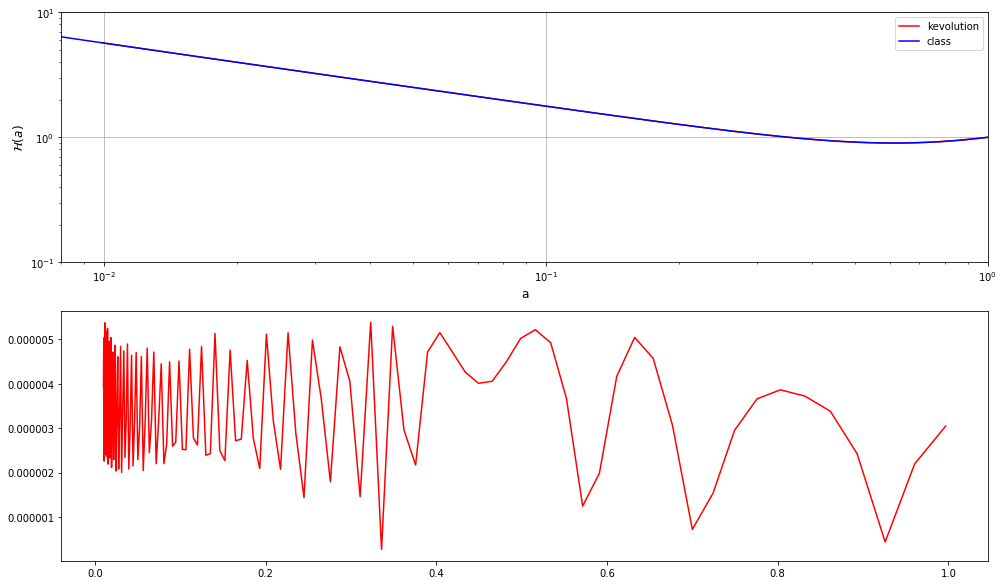

In [3]:
#################################
#################################
# Cosmological parameters.

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
H_list=[]
a_list=1./(1.+zlist)
Class_Phi_power_zall=[]

H_list=(Hubble_conf_Mpc(1./(1.+zlist[i])))
#     Class_Phi_power_zall.append(As*(class_phi_kess_zall[i][:,7])**2 *((class_phi_kess_zall[i][:,0]/kp)**(ns-1.)) );
# np.shape(Class_Phi_power_zall)

#Plot setting
plt.figure(figsize=(14,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 13)
plt.subplot(211)
#plt.loglog(bg_Gevolution_lin[:,2],2.*np.abs(np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))-bg_Gevolution_lin[:,3])/(bg_Gevolution_lin[:,3]+np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))),".",color="olive",
#           label=r"2|$\frac{\mathcal{H}(fluid)-\mathcal{H}(field)}{\mathcal{H}(fluid)+\mathcal{H}(field)}|$")
aclass_cs_e3=1./(1+bg_class[:,0])
a=np.arange(0.001,2,0.0001)
plt.loglog(bg_Gevolution_lin_LargeBox[:,2],bg_Gevolution_lin_LargeBox[:,3],color="red",
           label="kevolution")
plt.plot(aclass_cs_e3,bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.),color="blue",
           label="class")
plt.xlim(8e-3,1)
plt.ylim(1e-1,10)
plt.xlabel("a",fontsize=12)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=12)
# plt.ylabel('log')
# plt.xlabel('log')

plt.legend()
plt.grid(True)
plt.tight_layout()


Hubble_interp=[]
interp_Hubble=(interp1d(aclass_cs_e3[:],bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.)) )
Hubble_interp=(interp_Hubble(bg_Gevolution_lin_LargeBox[:-10,2]) )

plt.subplot(212)
plt.plot(bg_Gevolution_lin_LargeBox[:-10,2],np.abs(bg_Gevolution_lin_LargeBox[:-10,3]-Hubble_interp[:])/Hubble_interp[:],color="red",label="fluid")
# plt.ylim(-1e-7,1e-7)

plt.show()

In [4]:
class_zall_interp_deltam_LargeBox=[]
class_zall_interp_deltam_Mid=[]
class_zall_interp_deltam_small=[]

class_zall_interp_deltakess_LargeBox=[]
class_zall_interp_deltakess_Mid=[]
class_zall_interp_deltakess_small=[]


class_zall_interp_phi_LargeBox=[]
class_zall_interp_phi_Mid=[]
class_zall_interp_phi_small=[]

class_zall_interp_phi_prime_LargeBox=[]
class_zall_interp_phi_prime_Mid=[]
class_zall_interp_phi_prime_small=[]

for i in range(0,zrange):
    interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
#     interp_class_deltam_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
#     interp_class_deltam_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )

    interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
#     interp_class_deltakess_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
#     interp_class_deltakess_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )

    interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
#     interp_class_phi_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
#     interp_class_phi_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    
#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

    class_zall_interp_deltam_LargeBox.append(interp_class_deltam(Gev_lin_delta_m_zall[i][:,0]))
    class_zall_interp_deltam_Mid.append(interp_class_deltam(Gev_lin_delta_m_zall[i+zrange][:,0]) )
    class_zall_interp_deltam_small.append(interp_class_deltam(Gev_lin_delta_m_zall[i+zrange*2][:,0]))

    class_zall_interp_deltakess_LargeBox.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i][:,0]) )
    class_zall_interp_deltakess_Mid.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+zrange][:,0]) )
    class_zall_interp_deltakess_small.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+zrange*2][:,0]) )

    class_zall_interp_phi_LargeBox.append(interp_class_phi(Gev_lin_phi_zall[i][:,0]) )
    class_zall_interp_phi_Mid.append(interp_class_phi(Gev_lin_phi_zall[i+zrange][:,0]) )
    class_zall_interp_phi_small.append(interp_class_phi(Gev_lin_phi_zall[i+zrange*2][:,0]) )

#     class_zall_interp_phi_prime_Hubble.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i][:,0]) )
#     class_zall_interp_phi_prime_LargeBox.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+11][:,0]) )
#     class_zall_interp_phi_prime_Mid.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+22][:,0]) )

In [103]:
k_num=np.shape(Gev_lin_deltakess_z_all[0][:,0])[0]
num_max=520;
num_min=1;

# Matter power fluid-class vs Gevolution

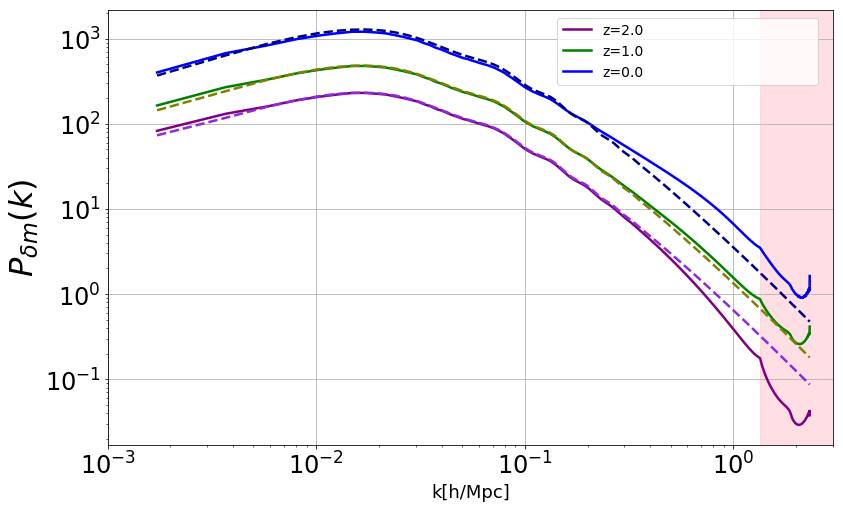

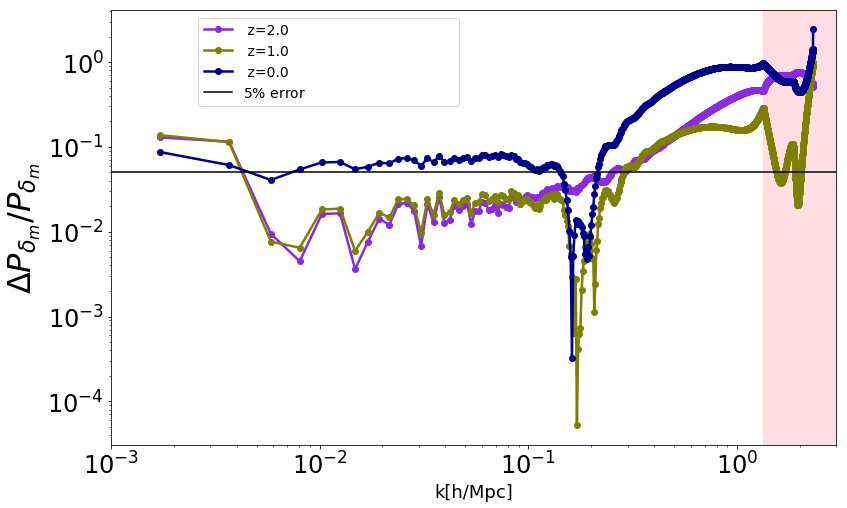

In [132]:

plt.figure(figsize=(13,8))

# plt.figure(1)
# plt.subplot(311)
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

kmax=31
l=0
for i in [8,9,30]:
    l=l+1
# i=0
    plt.loglog(Gev_lin_delta_m_zall[i][:,0], Gev_lin_delta_m_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,0]**3,color=ColorsII[l],linestyle='solid',lw=2.5, label=r"z="+str(zlist[i]) )  
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0], Gev_lin_delta_m_zall[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,0]**0,"-",color=ColorsI[1+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0], Gev_lin_delta_m_zall[i+zrange*2][:,1]/Gev_lin_delta_m_zall[i+zrange*2][:,0]**0,"-",color=ColorsI[2+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i][:,0],Class_deltam_power/Gev_lin_delta_m_zall[i][:,0]**3
               ,color=ColorsI[l],linestyle='dashed',lw=2.5 )  
#                    ,color="red",linestyle='dashed',lw=2.5, label=r"class, z="+str(zlist_class[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
plt.axvspan(1.34, 14, alpha=0.5, color='pink')
       
plt.legend(bbox_to_anchor=(0.62, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)

plt.ylabel(r"${P}_{\delta m}(k)$",fontsize=32)
plt.xlim(0.001,3)
# plt.ylim(2.e-9,300)
plt.grid(True)
plt.savefig('deltam_pow_cs02_w09_Large.jpg', format='jpg',dpi=200, bbox_inches='tight' )
plt.show()
# plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='dashed',lw=1.5)

plt.figure(figsize=(13,8))
# plt.subplot(212)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in  [8,9,30]:
    l=l+1
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i][:,0],np.abs( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.12, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta{P}_{\delta_{m}}/{P}_{\delta_{m}} $",fontsize=32)
# plt.ylim(1.e-3,200)
plt.xlim(0.001,3)
plt.savefig('deltam_relerror_cs02_w09_Large.jpg', format='jpg',dpi=200, bbox_inches='tight' )

plt.show()

# plt.figure(figsize=(15,15))
# plt.subplot(313)
# # ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (kmax-1,kmax):
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i][:,0],( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange][:,0],( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange*2][:,0],( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

# #     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
# #     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
# #     plt.semilogx(Gev_lin_delta_m_zall[i+22][:,0],( Gev_lin_delta_m_zall[i+22][:,1]-Class_deltam_power[:])
# #                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# # plt.axhline(y=0.05,color="black",lw=2.5)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
# plt.ylim(-0.7,6)
# plt.xlim(0.001,60)

# plt.show()



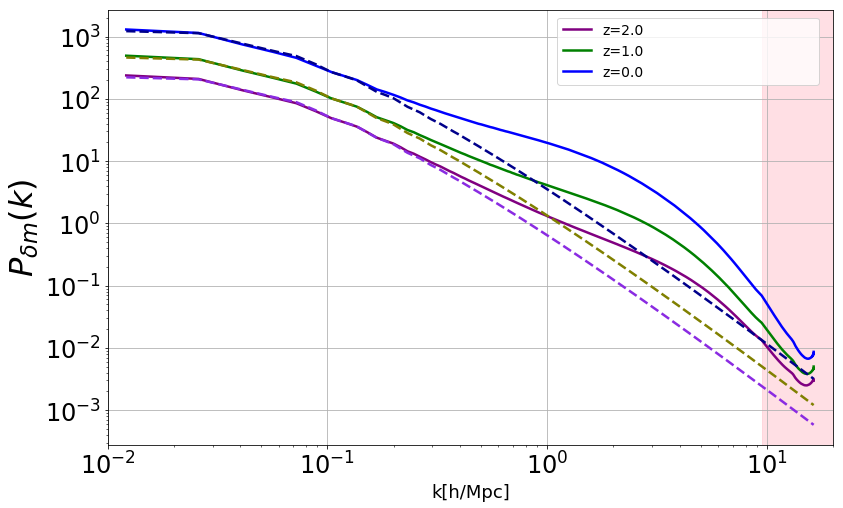

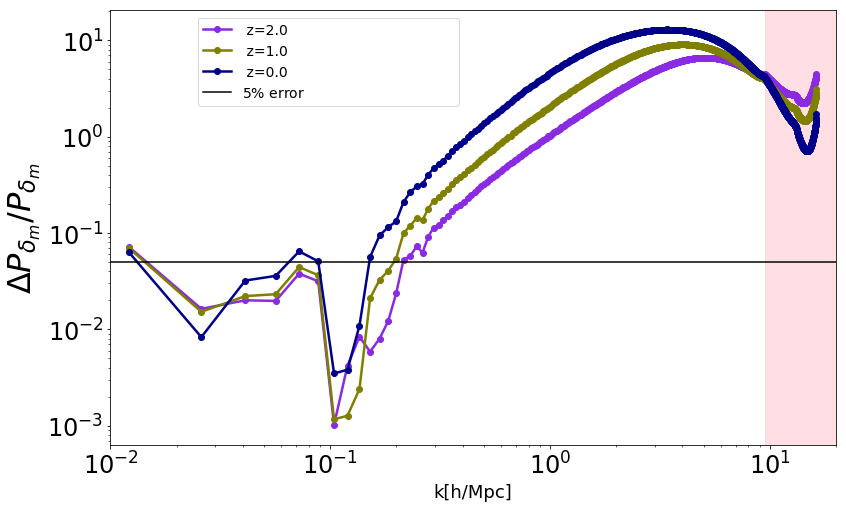

In [133]:

plt.figure(figsize=(13,8))

# plt.figure(1)
# plt.subplot(311)
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

kmax=31
l=0
for i in [8,9,30]:
    l=l+1
# i=0
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0], Gev_lin_delta_m_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,0]**3,color=ColorsII[l],linestyle='solid',lw=2.5, label=r"z="+str(zlist[i]) )  
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0], Gev_lin_delta_m_zall[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,0]**3,"-",color=ColorsI[1+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0], Gev_lin_delta_m_zall[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,0]**3,color=ColorsII[l],linestyle='solid',lw=2.5, label=r"z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0], Gev_lin_delta_m_zall[i+zrange*2][:,1]/Gev_lin_delta_m_zall[i+zrange*2][:,0]**0,"-",color=ColorsI[2+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0],Class_deltam_power/Gev_lin_delta_m_zall[i][:,0]**3
#                ,color=ColorsI[l],linestyle='dashed',lw=2.5 )  
#                    ,color="red",linestyle='dashed',lw=2.5, label=r"class, z="+str(zlist_class[i]) )  

    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],Class_deltam_power/Gev_lin_delta_m_zall[i+zrange][:,0]**3,"-"
               ,color=ColorsI[l],linestyle='dashed',lw=2.5 )  
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
plt.axvspan(9.5, 30, alpha=0.5, color='pink')
       
plt.legend(bbox_to_anchor=(0.62, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)

plt.ylabel(r"${P}_{\delta m}(k)$",fontsize=32)
plt.xlim(0.01,20)
# plt.ylim(2.e-9,300)
plt.grid(True)
plt.savefig('deltam_pow_cs02_w09_mid.jpg', format='jpg',dpi=200, bbox_inches='tight' )
plt.show()
# plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='dashed',lw=1.5)

plt.figure(figsize=(13,8))
# plt.subplot(212)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in  [8,9,30]:
    l=l+1
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0],np.abs( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axvspan(9.5, 30, alpha=0.5, color='pink')
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.12, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta{P}_{\delta_{m}}/{P}_{\delta_{m}} $",fontsize=32)
# plt.ylim(1.e-3,200)
plt.xlim(0.01,20)
plt.savefig('deltam_relerror_cs02_w09_mid.jpg', format='jpg',dpi=200, bbox_inches='tight' )

plt.show()

# plt.figure(figsize=(15,15))
# plt.subplot(313)
# # ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (kmax-1,kmax):
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i][:,0],( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange][:,0],( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange*2][:,0],( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

# #     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
# #     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
# #     plt.semilogx(Gev_lin_delta_m_zall[i+22][:,0],( Gev_lin_delta_m_zall[i+22][:,1]-Class_deltam_power[:])
# #                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# # plt.axhline(y=0.05,color="black",lw=2.5)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
# plt.ylim(-0.7,6)
# plt.xlim(0.001,60)

# plt.show()



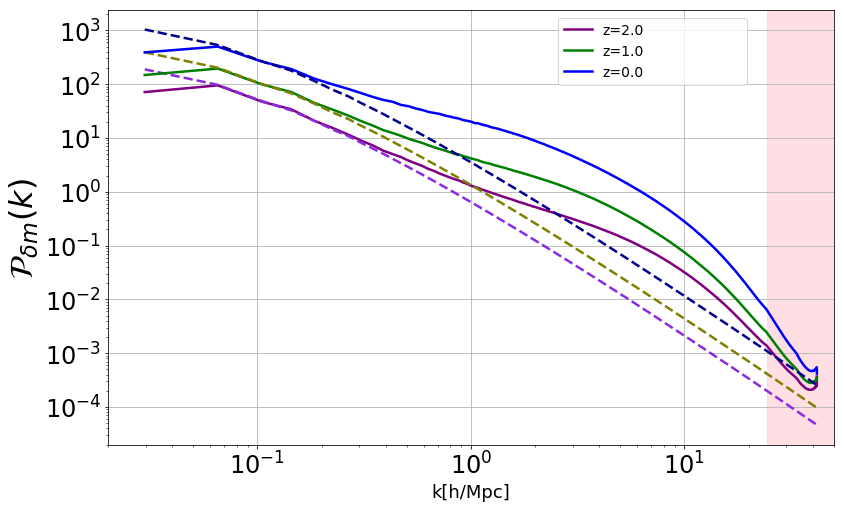

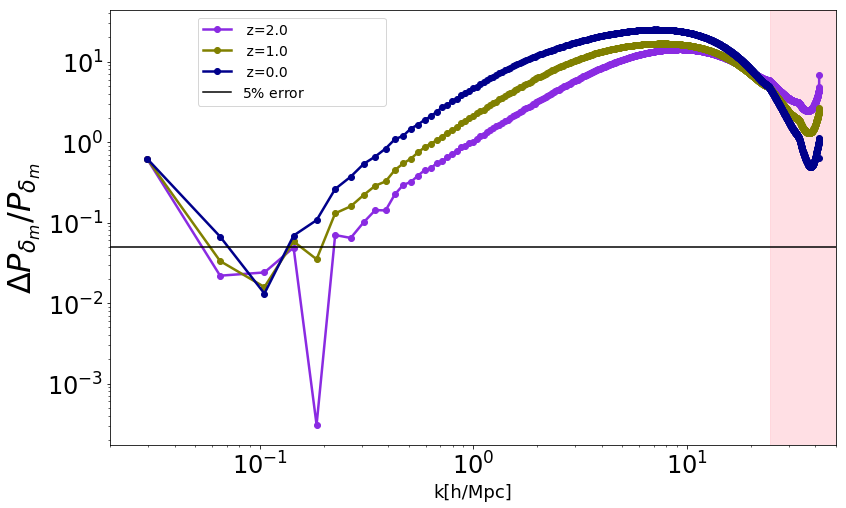

In [136]:

plt.figure(figsize=(13,8))

# plt.figure(1)
# plt.subplot(311)
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

kmax=31
l=0
for i in [8,9,30]:
    l=l+1
# i=0
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0], Gev_lin_delta_m_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,0]**3,color=ColorsII[l],linestyle='solid',lw=2.5, label=r"z="+str(zlist[i]) )  
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0], Gev_lin_delta_m_zall[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,0]**3,"-",color=ColorsI[1+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
    plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0], Gev_lin_delta_m_zall[i+zrange*2][:,1]/Gev_lin_delta_m_zall[i+zrange*2][:,0]**3,color=ColorsII[l],linestyle='solid',lw=2.5, label=r"z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0], Gev_lin_delta_m_zall[i+zrange*2][:,1]/Gev_lin_delta_m_zall[i+zrange*2][:,0]**0,"-",color=ColorsI[2+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0],Class_deltam_power/Gev_lin_delta_m_zall[i][:,0]**3
#                ,color=ColorsI[l],linestyle='dashed',lw=2.5 )  
#                    ,color="red",linestyle='dashed',lw=2.5, label=r"class, z="+str(zlist_class[i]) )  

    Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],Class_deltam_power/Gev_lin_delta_m_zall[i+zrange*2][:,0]**3,"-"
               ,color=ColorsI[l],linestyle='dashed',lw=2.5 )  
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
       
plt.legend(bbox_to_anchor=(0.62, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)

plt.ylabel(r"$\mathcal{P}_{\delta m}(k)$",fontsize=32)
plt.xlim(0.02,50)
# plt.ylim(2.e-9,300)
plt.grid(True)
plt.savefig('deltam_pow_cs02_w09_small.jpg', format='jpg',dpi=200, bbox_inches='tight' )
plt.show()
# plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='dashed',lw=1.5)

plt.figure(figsize=(13,8))
# plt.subplot(212)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in  [8,9,30]:
    l=l+1
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0],np.abs( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.12, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta{P}_{\delta_{m}}/{P}_{\delta_{m}} $",fontsize=32)
# plt.ylim(1.e-3,200)
plt.xlim(0.02,50)
plt.savefig('deltam_relerror_cs02_w09_small.jpg', format='jpg',dpi=200, bbox_inches='tight' )

plt.show()

# plt.figure(figsize=(15,15))
# plt.subplot(313)
# # ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (kmax-1,kmax):
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i][:,0],( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange][:,0],( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange*2][:,0],( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

# #     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
# #     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
# #     plt.semilogx(Gev_lin_delta_m_zall[i+22][:,0],( Gev_lin_delta_m_zall[i+22][:,1]-Class_deltam_power[:])
# #                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# # plt.axhline(y=0.05,color="black",lw=2.5)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
# plt.ylim(-0.7,6)
# plt.xlim(0.001,60)

# plt.show()



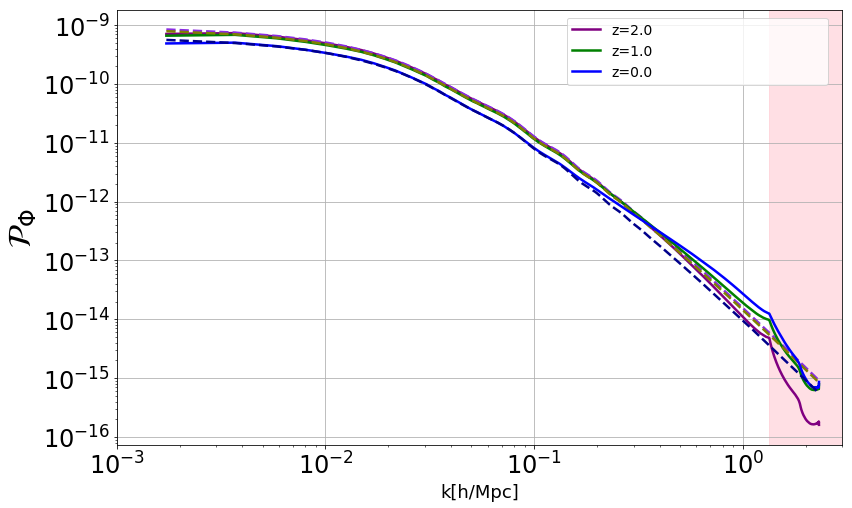

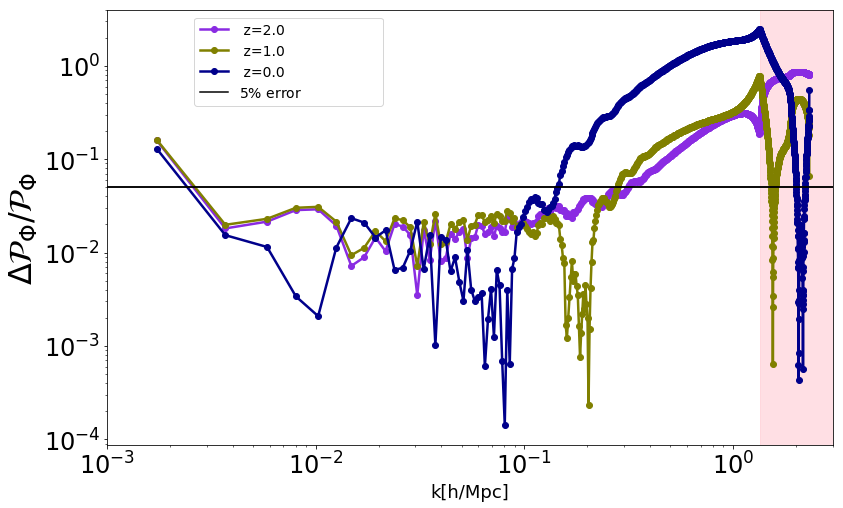

In [30]:

plt.figure(figsize=(13,8))

# plt.figure(1)
# plt.subplot(311)
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

kmax=31
l=0
for i in [8,9,30]:
    l=l+1
# i=0
    plt.loglog(Gev_lin_phi_zall[i][:,0], Gev_lin_phi_zall[i][:,1]/Gev_lin_phi_zall[i][:,0]**0,color=ColorsII[l],linestyle='solid',lw=2.5, label=r"z="+str(zlist[i]) )  


    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i][:,0],Class_deltam_power/Gev_lin_delta_m_zall[i][:,0]**0,"-"
               ,color=ColorsI[l],linestyle='dashed',lw=2.5 )  
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
       
plt.legend(bbox_to_anchor=(0.62, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.axvspan(1.34, 14, alpha=0.5, color='pink')
#  plt.xlim(0.001,3)
      
plt.legend(bbox_to_anchor=(0.62, 0.88, 0.36, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)

plt.ylabel(r"$\mathcal{P}_{\Phi} $",fontsize=32)
# plt.ylim(2.e-9,300)
plt.grid(True)
plt.xlim(0.001,3)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.savefig('delta_phi_pow_cs02_w09_Large.jpg', format='jpg',dpi=200, bbox_inches='tight' )
plt.show()
# plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='dashed',lw=1.5)

plt.figure(figsize=(13,8))
# plt.subplot(212)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in  [8,9,30]:
    l=l+1
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0],np.abs( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_phi_zall[i][:,0],np.abs( Gev_lin_phi_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.12, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\Phi}/\mathcal{P}_{\Phi} $",fontsize=32)
# plt.ylim(1.e-3,200)
plt.xlim(0.001,3)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.savefig('delta_phi_relerror_cs02_w09_small.jpg', format='jpg',dpi=200, bbox_inches='tight' )

plt.show()

# plt.figure(figsize=(15,15))
# plt.subplot(313)
# # ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (kmax-1,kmax):
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i][:,0],( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange][:,0],( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+zrange*2][:,0],( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

# #     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
# #     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
# #     plt.semilogx(Gev_lin_delta_m_zall[i+22][:,0],( Gev_lin_delta_m_zall[i+22][:,1]-Class_deltam_power[:])
# #                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# # plt.axhline(y=0.05,color="black",lw=2.5)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
# plt.ylim(-0.7,6)
# plt.xlim(0.001,60)

# plt.show()



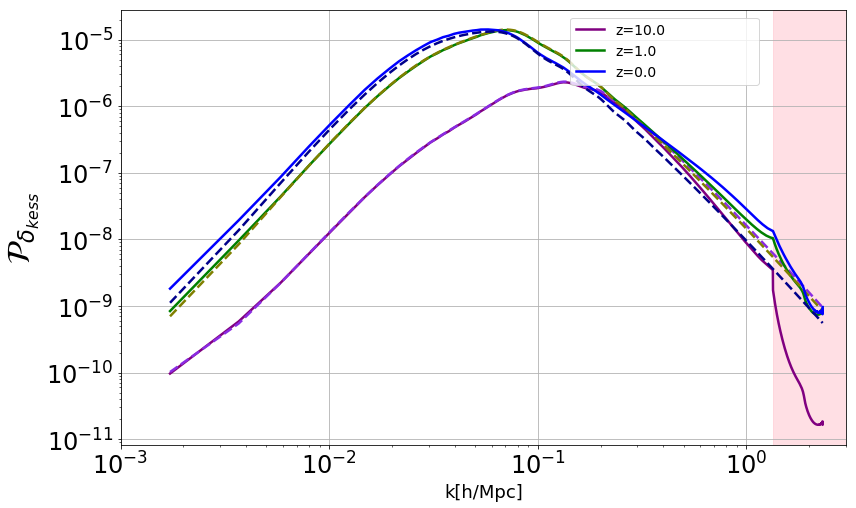

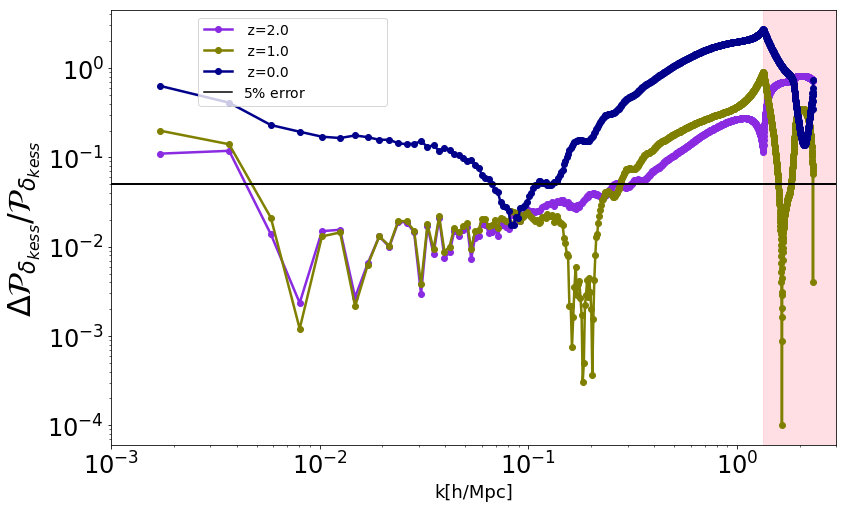

In [31]:

plt.figure(figsize=(13,8))

# plt.figure(1)
# plt.subplot(311)
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

kmax=31
l=0
for i in [3,9,30]:
    l=l+1
# i=0
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0], Gev_lin_deltakess_z_all[i][:,1]/Gev_lin_deltakess_z_all[i][:,0]**0,color=ColorsII[l],linestyle='solid',lw=2.5, label=r"z="+str(zlist[i]) )  


    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0],Class_deltam_power/Gev_lin_deltakess_z_all[i][:,0]**0,"-"
               ,color=ColorsI[l],linestyle='dashed',lw=2.5 )  
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
       
plt.legend(bbox_to_anchor=(0.62, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)

plt.ylabel(r"$\mathcal{P}_{\delta_{kess}} $",fontsize=32)
plt.xlim(0.02,50)
# plt.ylim(2.e-9,300)
plt.grid(True)
plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.xlim(0.001,3)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.savefig('delta_kess_pow_cs02_w09_Large.jpg', format='jpg',dpi=200, bbox_inches='tight' )
plt.show()
# plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='dashed',lw=1.5)

plt.figure(figsize=(13,8))
# plt.subplot(212)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in  [8,9,30]:
    l=l+1
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i][:,0],np.abs( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0],np.abs( Gev_lin_deltakess_z_all[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[l],linestyle='solid',lw=2.5, label=r" z="+str(zlist[i]) ) 

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.12, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{kess}} /\mathcal{P}_{\delta_{kess}}$",fontsize=32)
# plt.ylim(1.e-3,200)
plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.xlim(0.001,3)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.savefig('delta_kess_relerror_cs02_w09_small.jpg', format='jpg',dpi=200, bbox_inches='tight' )

plt.show()


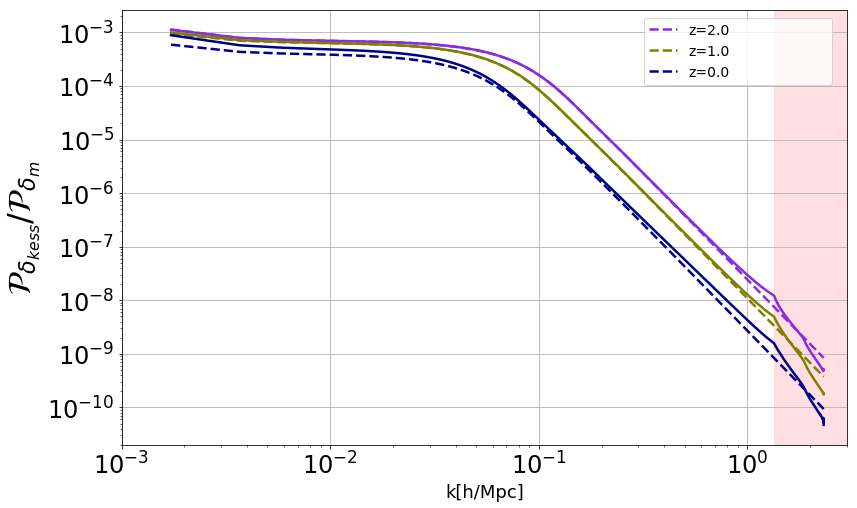

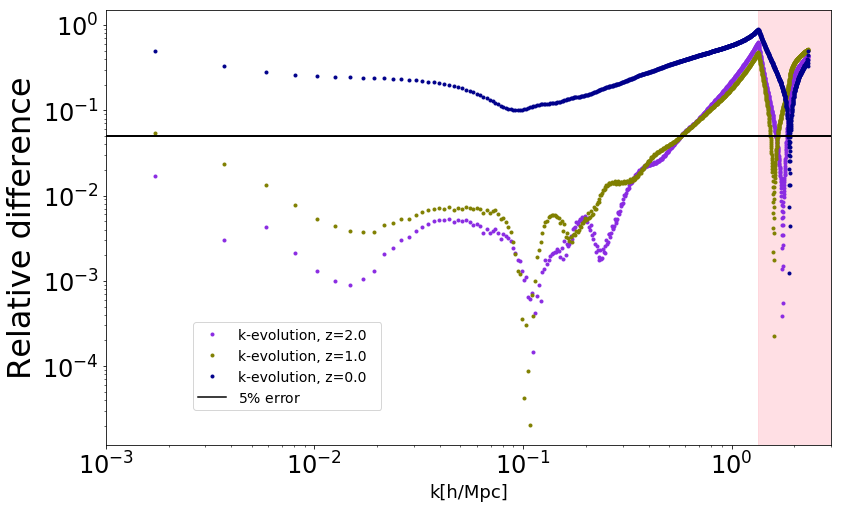

In [33]:

plt.figure(figsize=(13,8))

# plt.figure(1)
# plt.subplot(311)
# plt.subplot(211)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

# kmax=31
l=0
for i in  [8,9,30]:
    l=l+1
# i=0
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0], Gev_lin_deltakess_z_all[i][:,1]/(Gev_lin_delta_m_zall[i][:,1]),linestyle='solid',color=ColorsI[l],lw=2.5 )  


    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0],Class_delta_kesspow/Class_deltam_power,linestyle='dashed',color=ColorsI[l],lw=2.5, label="z="+str(zlist_class[i]) )  
    
#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
       
plt.legend(bbox_to_anchor=(0.72, 0.88, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)

plt.ylabel(r"$\mathcal{P}_{\delta_{kess}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.xlim(0.001,3)
# plt.ylim(2.e-9,300)
plt.grid(True)
plt.xlim(0.001,3)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.savefig('deltam_deltakess_divide_pow_cs02_w09_Large.jpg', format='jpg',dpi=200, bbox_inches='tight' )
plt.show()
# plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='dashed',lw=1.5)

plt.figure(figsize=(13,8))
# plt.subplot(212)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
l=0
for i in  [8,9,30]:
    l=l+1
    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization
    pratio_class=Class_delta_kesspow/Class_deltam_power;
    p_gev_ratio=Gev_lin_deltakess_z_all[i][:,1]/Gev_lin_delta_m_zall[i][:,1];
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0],np.abs(p_gev_ratio-pratio_class)/pratio_class,".",color=ColorsI[l],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+zrange*2][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+zrange*2][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange*2][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[2+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axvspan(24.5, 50, alpha=0.5, color='pink')
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.legend(bbox_to_anchor=(0.12, 0.18, 0.26, .102), loc=1,ncol=1,fontsize=14, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"Relative difference",fontsize=32)
# plt.ylim(1.e-3,200)
plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.xlim(0.001,3)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.axvspan(1.34, 14, alpha=0.5, color='pink')

plt.savefig('deltam_deltakess_divide_pow_cs02_w09_Large_rel.jpg', format='jpg',dpi=200, bbox_inches='tight' )

plt.show()


('H0[1/Mpc]=100h/c: ', 0.00022534256015206366)


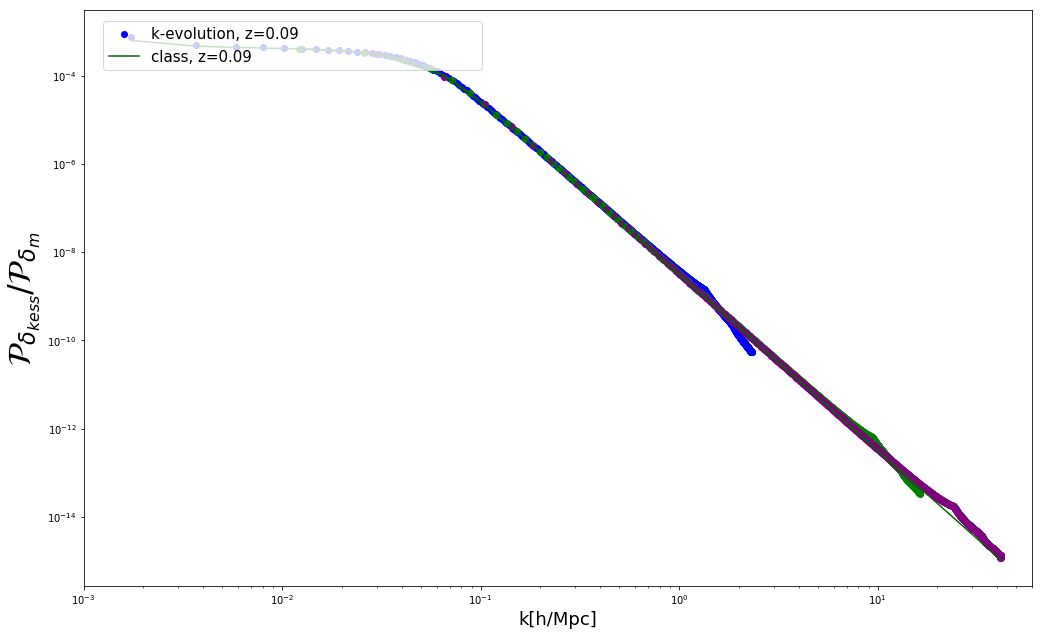

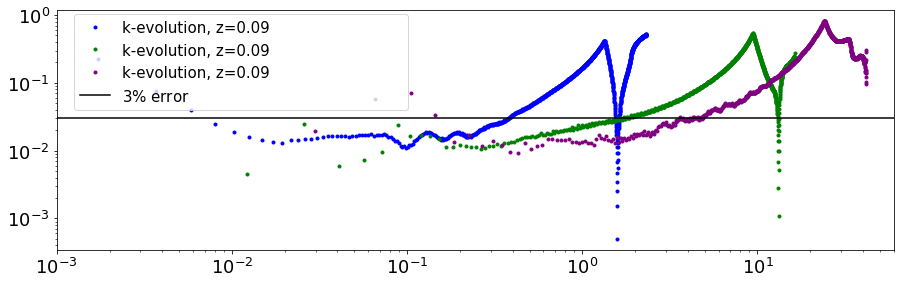

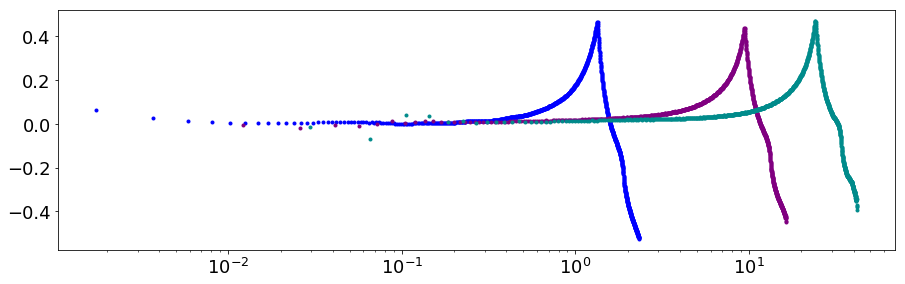

In [12]:
plt.figure(figsize=(17,36))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)


# Cosmological parameters.
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;


string=r"$N_{grid} =1920, boxsize= 1600.0 \;Mpc/h \,, \, nKe$$\_numsteps=10 \, , \, time step limit = 0.04$";

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen
plt.subplot(211)
kmax=20
l=0
for i in range(kmax-1,kmax,):
    l=l+1
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0], Gev_lin_deltakess_z_all[i][:,1]/(Gev_lin_delta_m_zall[i][:,1]),"o",color=ColorsI[l],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
    plt.loglog(Gev_lin_deltakess_z_all[i+zrange][:,0], Gev_lin_deltakess_z_all[i+zrange][:,1]/(Gev_lin_delta_m_zall[i+zrange][:,1]),"o",color=ColorsI[l+1],lw=2.0 )  
    plt.loglog(Gev_lin_deltakess_z_all[i+zrange*2][:,0], Gev_lin_deltakess_z_all[i+zrange*2][:,1]/(Gev_lin_delta_m_zall[i+zrange*2][:,1]),"o",color=ColorsI[l+2],lw=2.0 )  
    
    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0],Class_delta_kesspow/Class_deltam_power,"-"
               ,color=ColorsI[i-10],lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
    
    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_Mid[i][:]**2)*Normlization
    plt.loglog(Gev_lin_deltakess_z_all[i+zrange][:,0],Class_delta_kesspow/Class_deltam_power,"-"
               ,color=ColorsI[i-10],lw=1.5 )  
    
    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_small[i][:]**2)*Normlization
    plt.loglog(Gev_lin_deltakess_z_all[i+zrange*2][:,0],Class_delta_kesspow/Class_deltam_power,"-"
               ,color=ColorsI[i-10],lw=1.5 )  
    
    #     Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_phi_zall[i+zrange][:,0],np.abs( Gev_lin_phi_zall[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5 )  
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.40, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\delta_{kess}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
plt.xlim(0.001,60)
# plt.ylim(2.e-4,1.e-1)
# plt.savefig('plotdeltakdeltam.jpg', format='jpg',dpi=300, bbox_inches='tight' )
plt.show()
plt.figure(figsize=(15,15))
plt.subplot(212)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# kmax=20
l=0
for i in range(kmax-1,kmax,1):
    l=l+1
    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization
    pratio_class=Class_delta_kesspow/Class_deltam_power;
    p_gev_ratio=Gev_lin_deltakess_z_all[i][:,1]/Gev_lin_delta_m_zall[i][:,1];
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0],np.abs(p_gev_ratio-pratio_class)/pratio_class,".",color=ColorsI[l],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

    Normlization=As*(Gev_lin_deltakess_z_all[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_Mid[i][:]**2)*Normlization
    pratio_class=Class_delta_kesspow/Class_deltam_power;
    p_gev_ratio=Gev_lin_deltakess_z_all[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,1];

    plt.loglog(Gev_lin_deltakess_z_all[i+zrange][:,0],np.abs(p_gev_ratio-pratio_class)/pratio_class,".",color=ColorsI[l+1],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

    
    Normlization=As*(Gev_lin_deltakess_z_all[i+zrange*2][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_small[i][:]**2)*Normlization;
    Class_delta_kesspow=(class_zall_interp_deltakess_small[i][:]**2)*Normlization
    pratio_class=Class_delta_kesspow/Class_deltam_power;
    p_gev_ratio=Gev_lin_deltakess_z_all[i+zrange*2][:,1]/Gev_lin_delta_m_zall[i+zrange*2][:,1];

    plt.loglog(Gev_lin_deltakess_z_all[i+zrange*2][:,0],np.abs(p_gev_ratio-pratio_class)/pratio_class,".",color=ColorsI[l+2],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )      

    plt.axhline(y=0.03,color="black",lw=1.5,label=r"$3\%$ error")
plt.xlim(0.001,60)

# #     Normlization=As*(Gev_lin_deltakess_z_all[i+22][:,0]/kp)**(ns-1.);
# #     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
# #     Class_delta_kesspow=(class_zall_interp_deltakess_Mid[i][:]**2)*Normlization
# #     pratio_class=Class_delta_kesspow/Class_deltam_power;
# #     p_gev_ratio=Gev_lin_deltakess_z_all[i+22][:,1]/Gev_lin_delta_m_zall[i+22][:,1];

# #     plt.loglog(Gev_lin_deltakess_z_all[i+22][:,0],np.abs(p_gev_ratio-pratio_class)/pratio_class,".",color=ColorsI[i-7],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

# #     Class_deltam_power=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization;
# #     plt.loglog(Gev_lin_deltakess_z_all[i+11][:,0],np.abs( Gev_lin_deltakess_z_all[i+11][:,1]-Class_deltam_power[:])
# #                /Class_deltam_power[:],"o",color=ColorsI[i-8],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.40, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)




plt.show()
